In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


gdpdata = pd.read_csv("D:/Anitha/Graduate/Courses/GradProject/CPSC597/Data/AdaBoost/CO2-Price-GDP.csv")
gdpdata.head()

,Year,State,CO2,Energy,EnergyPrice,GDP
0,1997,Alabama,134.10,1956297,17490,144501.2
1,1998,Alabama,133.50,1997696,17490,149568.2
2,1999,Alabama,135.85,2040647,17490,154900.2
3,2000,Alabama,142.30,2093922,17490,157221.3
4,2001,Alabama,133.31,1898857,17490,156853.2


In [2]:
from sklearn import metrics
data = np.random.rand(len(gdpdata)) < 0.8
train = gdpdata[data]
test = gdpdata[~data]
train_x = np.asanyarray(train[['Energy','EnergyPrice','GDP']])
train_y = np.asanyarray(train[['CO2']])
#train_x, test_x, train_y, test_y = train_test_split(gdpdata, test_size=0.2, random_state=0)
model = AdaBoostRegressor(n_estimators=50)
model.fit(train_x, train_y)
scores = cross_val_score(model, train_x,train_y,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())
print(train_x.shape, train_y.shape)



Mean cross-validataion score: 0.75
(941, 3) (941, 1)


In [3]:
test_x = np.asanyarray(test[['Energy','EnergyPrice','GDP']])
test_y = np.asanyarray(test[['CO2']])
pred_y = model.predict(test_x)
mse = mean_squared_error(test_y,pred_y)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))
print(test_x.shape, pred_y.shape)


MSE: 408.13
RMSE: 20.20
(232, 3) (232,)


In [4]:
#Measuring Goodness of fit in Training data

from sklearn import metrics
print('R2 Value:',metrics.r2_score(test_y, pred_y))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((test_y - pred_y) / test_y)) * 100))

R2 Value: 0.9701213266757001
Accuracy -172.84965243490262


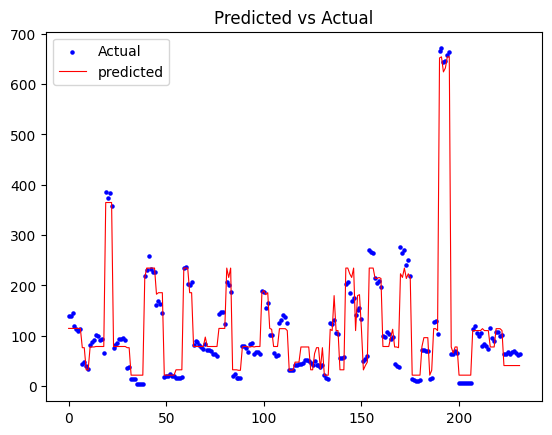

In [5]:
x_axis = range(len(test_y))
plt.scatter(x_axis, test_y, s=5, color="blue", label="Actual")
plt.plot(x_axis, pred_y, lw=0.8, color="red", label="predicted")
plt.legend()
plt.title("Predicted vs Actual")
plt.show()